# Project Title: 

Sepsis Classification Machine Learning Project with FastAPI Deployment

# Business Understanding

## 1. Introduction
This project focuses on the early detection and classification of sepsis, a life-threatening medical condition. Sepsis is a critical concern in healthcare, and early diagnosis can significantly improve patient outcomes. The objective is to build a robust machine learning model for sepsis classification and deploy it into a web application using FastAPI, making it accessible for real-time predictions.

### 1.1. Objectives
- Understand the Data: 
The primary objective of this project is to gain a comprehensive understanding of the patient data, which includes various health-related features, demographics, and the presence or absence of sepsis. This understanding will empower healthcare professionals and decision-makers to make informed decisions regarding patient care and intervention.

- Predict Sepsis: 
Develop an accurate machine learning classification model that can predict the likelihood of a patient developing sepsis based on the provided features. Early and accurate sepsis prediction is crucial for timely medical intervention and improving patient outcomes.

- Web Application Integration: 
Integrate the trained sepsis classification model into a web application using FAST API. This web application will serve as a practical tool for healthcare practitioners to input patient data and receive real-time sepsis risk predictions, aiding in clinical decision-making.

### 1.2. Methodology
To achieve the project objectives, we will follow a structured approach:

- Data Loading and Exploration: 
Begin by loading and exploring the patient data, including features like age, vital signs, and medical history. This step will provide initial insights into the dataset and identify any data quality issues.

- Data Preprocessing: 
Handle missing values, perform feature engineering, and encode categorical variables as needed. Preprocessing steps will ensure that the data is ready for training the machine learning model.

- Model Development: 
Select and implement a suitable machine learning classification model for sepsis prediction. This model will be trained on historical patient data to learn patterns indicative of sepsis.

- Model Evaluation: 
Assess the model's performance using appropriate evaluation metrics such as accuracy, precision, recall, F1-score, and ROC-AUC. Rigorous evaluation will help identify the model's effectiveness in predicting sepsis cases.

- FAST API Integration: 
Integrate the trained machine learning model into a FAST API-based web application. This application will provide a user-friendly interface for healthcare professionals to input patient data and obtain sepsis risk predictions.

- Testing and Validation: 
Conduct thorough testing and validation of the web application to ensure its reliability and accuracy in real-time sepsis risk assessment.

- Documentation: 
Provide detailed documentation on how to use the web application, including input requirements and interpretation of results.

By following this methodology, we aim to provide healthcare professionals with a valuable tool for early sepsis detection and decision support, ultimately contributing to improved patient care and outcomes.

# Setup

## Installations

## Importation of Relevant Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading

### Loading the Train and Test Datasets

#### Train Dataset

In [14]:
# Load The Train Dataset
train_df = pd.read_csv("data/Paitients_Files_Train.csv")
train_df.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


#### Test Dataset

In [84]:
# Load The Test Dataset
test_df = pd.read_csv("data/Paitients_Files_Test.csv")
test_df.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


Columns Description (Common to Both Datasets):

- ID: A unique identifier for each patient.
- PRG: Number of pregnancies (applicable only to females).
- PL: Plasma glucose concentration.
- PR: Diastolic blood pressure.
- SK: Triceps skinfold thickness.
- TS: 2-hour serum insulin.
- M11: Body mass index (BMI).
- BD2: Diabetes pedigree function.
- Age: Age of the patient.
- Insurance: Whether the patient has insurance coverage (1 for Yes, 0 for No).
Sepsis (Only in Test Dataset): The target variable indicating the presence or absence of sepsis (Positive for presence, Negative for absence).

Both datasets contain patient-related information, with the test dataset having an additional "Sepsis" column for target classification. The  dataset is designed for model training, while the test dataset will be used for model evaluation.

## Hypothesis

Null Hypothesis (H0): There is no significant association between the patient's age and the likelihood of sepsis.

Alternative Hypothesis (H1): There is a significant association between the patient's age and the likelihood of sepsis.

## Key Analytical Questions

i. What is the distribution of sepsis cases (Positive and Negative) in the Train dataset, and how does it affect the analysis?

ii. Are there any correlations or patterns between the numerical features (e.g., PRG, PL, PR, SK, TS, M11, BD2, Age) and the presence of sepsis (Positive/Negative)?

iii. How does the distribution of key numerical variables (e.g., PR, SK, TS, M11) differ between patients with and without sepsis?

iv. Is there a relationship between the number of pregnancies (PRG) and plasma glucose concentration (PL)? Does this relationship vary with the presence of sepsis?

v. Are there any significant differences in diastolic blood pressure (PR) between patients with different triceps skinfold thickness (SK) levels?

vi. Does the body mass index (M11) vary significantly with 2-hour serum insulin (TS) levels?

vii. Is there a correlation between the diabetes pedigree function (BD2) and age? How does this correlation affect the likelihood of sepsis?

viii. Are patients with insurance coverage more likely to have certain health characteristics (e.g., higher age, higher BMI) compared to those without insurance coverage?

ix. Do certain combinations of numerical variables provide better predictive power for sepsis classification using machine learning models?

x. How can the insights gained from this bivariate analysis inform feature selection and engineering for the sepsis classification model?

# Exploratory Data Analysis (EDA)

## Understanding the datasets

An in-depth exploration of the datasets is presented to gain insights into the available variables,their distributions and relationships. This step will provide an initial undertanding of the datasets to identify any data quality issues that will inform the cleaning and pre-processing.

### i. Column Information of The Datasets

In [18]:
# Column information of the test dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         169 non-null    object 
 1   PRG        169 non-null    int64  
 2   PL         169 non-null    int64  
 3   PR         169 non-null    int64  
 4   SK         169 non-null    int64  
 5   TS         169 non-null    int64  
 6   M11        169 non-null    float64
 7   BD2        169 non-null    float64
 8   Age        169 non-null    int64  
 9   Insurance  169 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 13.3+ KB


- There are a total of 599 entries (rows) and 11 columns, each with a specific data type.
- The 'ID' column serves as a unique identifier for each patient. 
- The 'Sepssis' column contains categorical data (object) and represents the target variable indicating the presence or absence of sepsis.
- The remaining columns (PRG, PL, PR, SK, TS, M11, BD2, Age, and Insurance) contain numerical data.

In [19]:
# Column information of the test dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         169 non-null    object 
 1   PRG        169 non-null    int64  
 2   PL         169 non-null    int64  
 3   PR         169 non-null    int64  
 4   SK         169 non-null    int64  
 5   TS         169 non-null    int64  
 6   M11        169 non-null    float64
 7   BD2        169 non-null    float64
 8   Age        169 non-null    int64  
 9   Insurance  169 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 13.3+ KB


- There are a total of 169 entries (rows) and 10 columns, each with a specific data type.
- Similar to the Train dataset, the 'ID' column serves as a unique identifier for each patient.
- Unlike the Train dataset, the Test dataset does not include the 'Sepssis' column, as it is intended for evaluating sepsis predictions and doesn't contain the target variable.

### ii. Shape of The Datasets

In [22]:
# The shape of the train dataset
train_df.shape

(599, 11)

In [23]:
# The shape of the train dataset
test_df.shape

(169, 10)

### iii. Summary Statistics Datasets

In [32]:
# Summary Statistics of The Train Dataset
train_df.describe().round(3)

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000,599.000,599.000,599.000,599.000,599.000,599.000,599.000,599.000
mean,3.825,120.154,68.733,20.563,79.461,31.920,0.481,33.290,0.686
std,3.363,32.682,19.336,16.018,116.576,8.008,0.338,11.828,0.464
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,64.000,0.000,0.000,27.100,0.248,24.000,0.000
50%,3.000,116.000,70.000,23.000,36.000,32.000,0.383,29.000,1.000
75%,6.000,140.000,80.000,32.000,123.500,36.550,0.647,40.000,1.000
max,17.000,198.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


In [33]:
# Summary Statistics of The Test
test_df.describe().round(3)

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,169.000,169.000,169.000,169.000,169.000,169.000,169.000,169.000,169.000
mean,3.917,123.521,70.426,20.444,81.000,32.250,0.439,33.065,0.728
std,3.402,29.259,19.427,15.765,110.721,7.445,0.307,11.548,0.446
min,0.000,56.000,0.000,0.000,0.000,0.000,0.100,21.000,0.000
25%,1.000,102.000,62.000,0.000,0.000,27.600,0.223,24.000,0.000
50%,3.000,120.000,74.000,23.000,0.000,32.400,0.343,28.000,1.000
75%,6.000,141.000,80.000,32.000,135.000,36.600,0.587,42.000,1.000
max,13.000,199.000,114.000,49.000,540.000,57.300,1.698,70.000,1.000


### iv. Checking for Missing Values in The Datasets

In [38]:
# Check for missing values in the datasets
datasets = {'train': train_df, 'test': test_df}

def show_missing_values(datasets):
    for name, data in datasets.items():
        print(f"Missing values in the {name.capitalize()} dataset:")
        print(data.isnull().sum())
        print('===' * 18)
        print()

show_missing_values(datasets)

Missing values in the Train dataset:
ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

Missing values in the Test dataset:
ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
dtype: int64



Both datasets do not have any missing values

### v. Checking for Duplicates in The Datasets

In [62]:
# Check for duplicates in the Train dataset
train_duplicates = train_df[train_df.duplicated()]

# Check for duplicates in the Test dataset
test_duplicates = test_df[test_df.duplicated()]

# Display the duplicate rows in the Train dataset, if any
if not train_duplicates.empty:
    print("Duplicate Rows in Train Dataset:")
    print(train_duplicates)
else:
    print("No Duplicate Rows in Train Dataset")

# Display the duplicate rows in the Test dataset, if any
if not test_duplicates.empty:
    print("\nDuplicate Rows in Test Dataset:")
    print(test_duplicates)
else:
    print("No Duplicate Rows in Test Dataset")

No Duplicate Rows in Train Dataset
No Duplicate Rows in Test Dataset


# Univariate Analysis

## i. Univariate Analysis for 'PRG' (Number of Pregnancies)

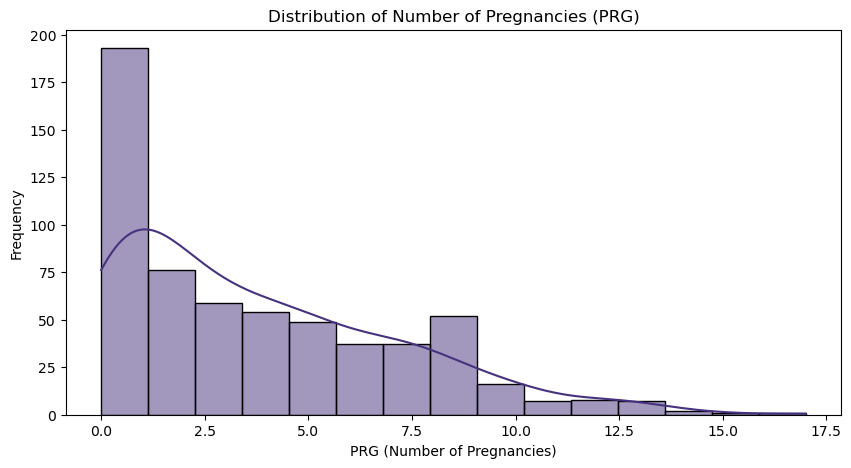

Summary Statistics for Number of Pregnancies (PRG):
count    599.000000
mean       3.824708
std        3.362839
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: PRG, dtype: float64


In [49]:
# Extract the 'PRG' column
prg_values = train_df['PRG']

# Plot a histogram
plt.figure(figsize=(10, 5))
sns.histplot(prg_values, kde=True, color=sns.color_palette('viridis')[0])
plt.title('Distribution of Number of Pregnancies (PRG)')
plt.xlabel('PRG (Number of Pregnancies)')
plt.ylabel('Frequency')
plt.show()

# Summary statistics
print('Summary Statistics for Number of Pregnancies (PRG):')
print(prg_values.describe())

- The average number of pregnancies is approximately 3.83, suggesting that, on average, patients have had several pregnancies.
- The range of values varies from 0 (no pregnancies) to a maximum of 17 pregnancies.
- The majority of patients fall within the range of 1 to 6 pregnancies.

## ii. Univariate Analysis for 'PL' (Plasma Glucose Concentration)

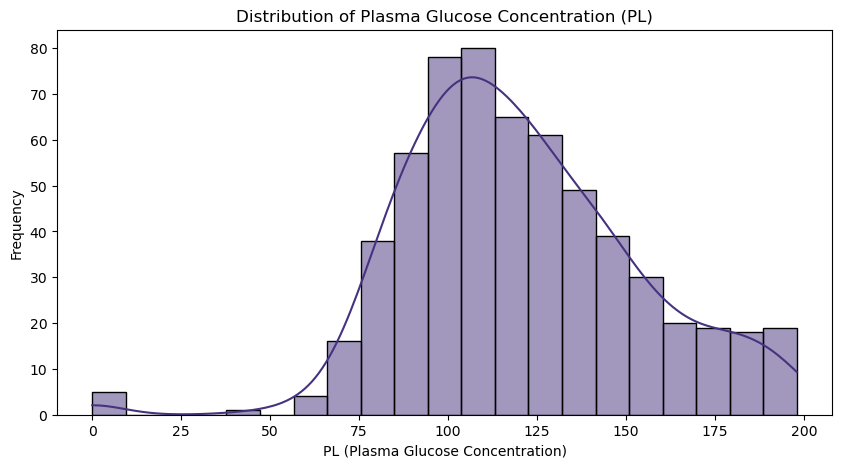

Summary Statistics for Plasma Glucose Concentration (PL):
count    599.000000
mean     120.153589
std       32.682364
min        0.000000
25%       99.000000
50%      116.000000
75%      140.000000
max      198.000000
Name: PL, dtype: float64


In [50]:
# Extract the 'PL' column
pl_values = train_df['PL']

# Plot a histogram
plt.figure(figsize=(10, 5))
sns.histplot(pl_values, kde=True, color=sns.color_palette('viridis')[0])
plt.title('Distribution of Plasma Glucose Concentration (PL)')
plt.xlabel('PL (Plasma Glucose Concentration)')
plt.ylabel('Frequency')
plt.show()

# Summary statistics
print('Summary Statistics for Plasma Glucose Concentration (PL):')
print(pl_values.describe())

- The mean plasma glucose concentration is around 120.15 mg/dL.
- The values range from a minimum of 0 mg/dL (which seems unusual) to a maximum of 198 mg/dL.
- The standard deviation of 32.68 indicates some variability in glucose levels among patients.

## iii. Univariate Analysis for 'PR' (Diastolic Blood Pressure)

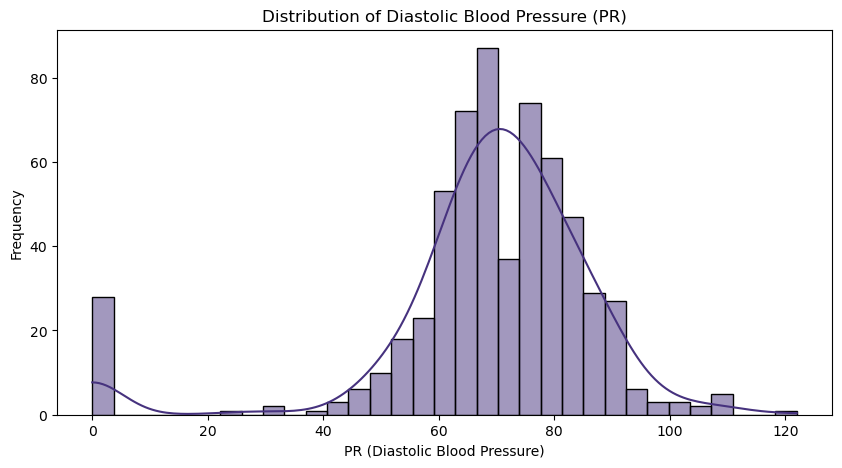

Summary Statistics for Diastolic Blood Pressure (PR):
count    599.000000
mean      68.732888
std       19.335675
min        0.000000
25%       64.000000
50%       70.000000
75%       80.000000
max      122.000000
Name: PR, dtype: float64


In [52]:
# Extract the 'PR' column
pr_values = train_df['PR']

# Plot a histogram
plt.figure(figsize=(10, 5))
sns.histplot(pr_values, kde=True, color=sns.color_palette('viridis')[0])
plt.title('Distribution of Diastolic Blood Pressure (PR)')
plt.xlabel('PR (Diastolic Blood Pressure)')
plt.ylabel('Frequency')
plt.show()

# Summary statistics
print('Summary Statistics for Diastolic Blood Pressure (PR):')
print(pr_values.describe())

- The mean diastolic blood pressure is approximately 68.73 mm Hg.
- The values range from a minimum of 0 mm Hg (which seems unusual) to a maximum of 122 mm Hg.
- Most patients have diastolic blood pressure levels within the range of 64 to 80 mm Hg.

## iv. Univariate Analysis for 'SK' (Triceps Skinfold Thickness)

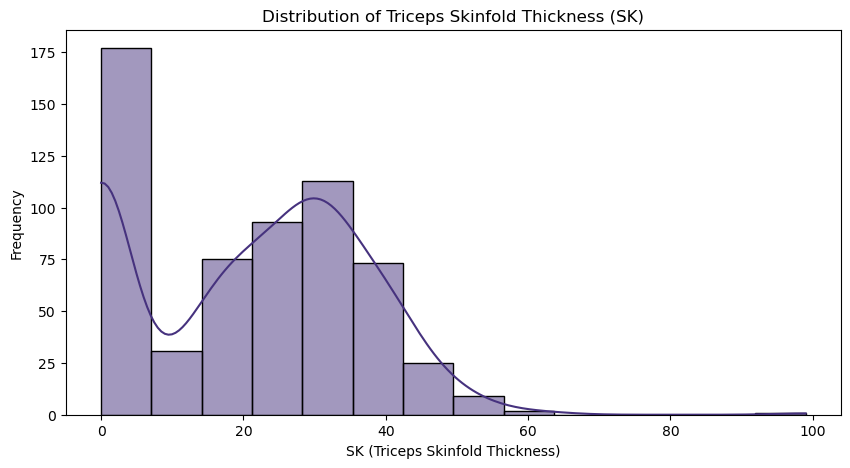

Summary Statistics for Triceps Skinfold Thickness (SK):
count    599.000000
mean      20.562604
std       16.017622
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SK, dtype: float64


In [53]:
# Extract the 'SK' column
sk_values = train_df['SK']

# Plot a histogram
plt.figure(figsize=(10, 5))
sns.histplot(sk_values, kde=True, color=sns.color_palette('viridis')[0])
plt.title('Distribution of Triceps Skinfold Thickness (SK)')
plt.xlabel('SK (Triceps Skinfold Thickness)')
plt.ylabel('Frequency')
plt.show()

# Summary statistics
print('Summary Statistics for Triceps Skinfold Thickness (SK):')
print(sk_values.describe())

- The mean triceps skinfold thickness is around 20.56 mm.
- There is a notable spread in skinfold thickness among patients.

## v. Univariate Analysis for 'TS' (2-Hour Serum Insulin)

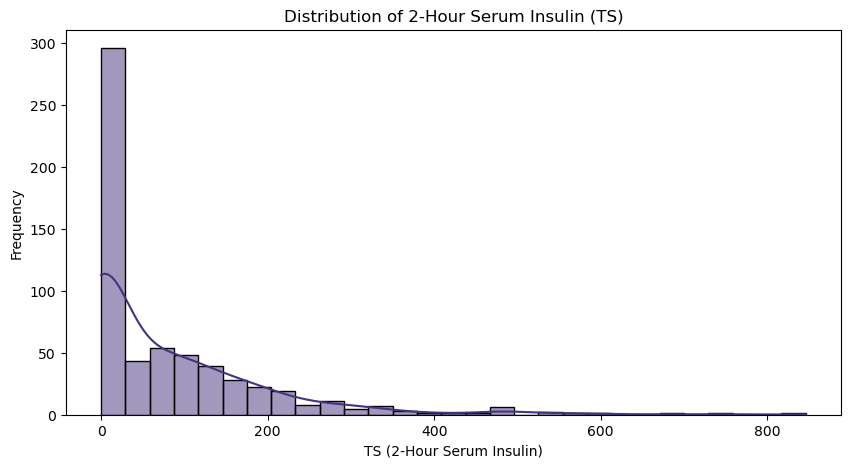

Summary Statistics for 2-Hour Serum Insulin (TS):
count    599.000000
mean      79.460768
std      116.576176
min        0.000000
25%        0.000000
50%       36.000000
75%      123.500000
max      846.000000
Name: TS, dtype: float64


In [61]:
# Extract the 'TS' column
ts_values = train_df['TS']

# Plot a histogram
plt.figure(figsize=(10, 5))
sns.histplot(ts_values, kde=True, color=sns.color_palette('viridis')[0])
plt.title('Distribution of 2-Hour Serum Insulin (TS)')
plt.xlabel('TS (2-Hour Serum Insulin)')
plt.ylabel('Frequency')
plt.show()

# Summary statistics
print('Summary Statistics for 2-Hour Serum Insulin (TS):')
print(ts_values.describe())

- The mean 2-hour serum insulin level is approximately 79.46 μU/ml.
- The values have a wide range, with a minimum of 0 μU/ml and a maximum of 846 μU/ml.
- The standard deviation of 116.58 suggests significant variability in insulin levels.

## vi. Univariate Analysis for 'M11' (Body Mass Index - BMI)

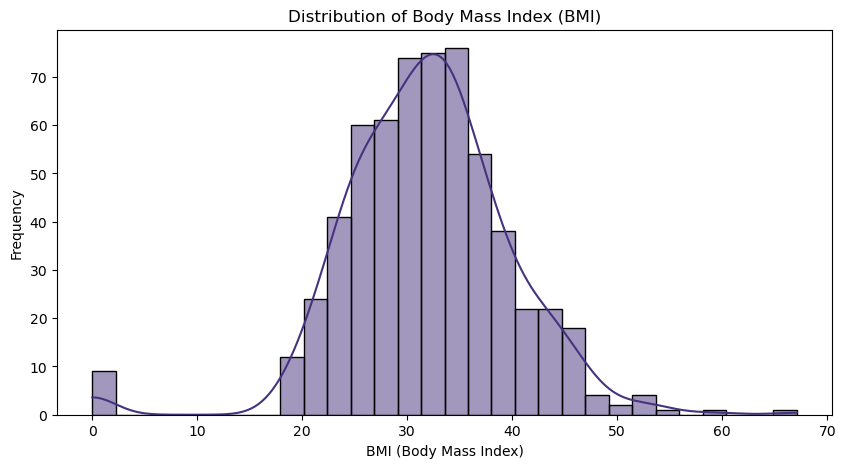

Summary Statistics for Body Mass Index (BMI):
count    599.000000
mean      31.920033
std        8.008227
min        0.000000
25%       27.100000
50%       32.000000
75%       36.550000
max       67.100000
Name: M11, dtype: float64


In [56]:
# Extract the 'M11' column
m11_values = train_df['M11']

# Plot a histogram
plt.figure(figsize=(10, 5))
sns.histplot(m11_values, kde=True, color=sns.color_palette('viridis')[0])
plt.title('Distribution of Body Mass Index (BMI)')
plt.xlabel('BMI (Body Mass Index)')
plt.ylabel('Frequency')
plt.show()

# Summary statistics
print('Summary Statistics for Body Mass Index (BMI):')
print(m11_values.describe())

- The mean BMI is approximately 31.92, indicating that, on average, patients have a BMI in the overweight range.
- BMI values vary widely, with a minimum of 0.078 (unusually low) and a maximum of 67.1.
- The standard deviation of 8.01 suggests substantial variability in BMI among patients.

## vii. BD2 (Diabetes Pedigree Function)

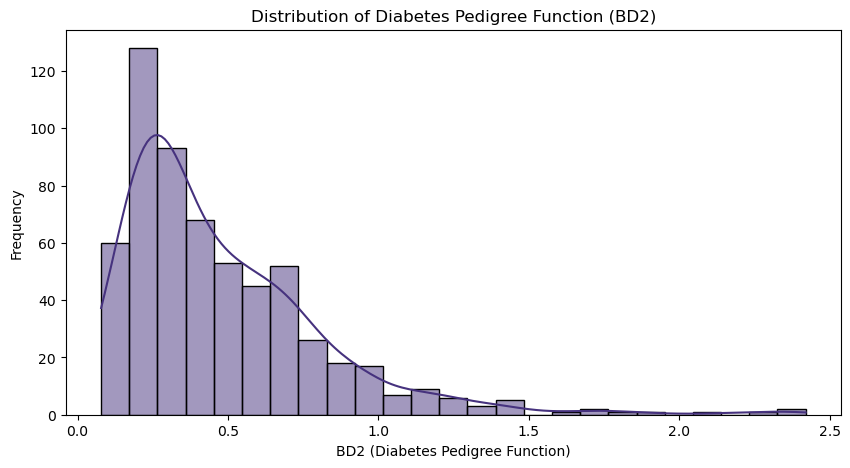

Summary Statistics for Diabetes Pedigree Function (BD2):
count    599.000000
mean       0.481187
std        0.337552
min        0.078000
25%        0.248000
50%        0.383000
75%        0.647000
max        2.420000
Name: BD2, dtype: float64


In [57]:
# Extract the 'BD2' column
bd2_values = train_df['BD2']

# Plot a histogram
plt.figure(figsize=(10, 5))
sns.histplot(bd2_values, kde=True, color=sns.color_palette('viridis')[0])
plt.title('Distribution of Diabetes Pedigree Function (BD2)')
plt.xlabel('BD2 (Diabetes Pedigree Function)')
plt.ylabel('Frequency')
plt.show()

# Summary statistics
print('Summary Statistics for Diabetes Pedigree Function (BD2):')
print(bd2_values.describe())

- The mean diabetes pedigree function value is 0.481, which reflects the diabetes history in family members.
- Values range from a minimum of 0.078 to a maximum of 2.42.
- The spread in diabetes pedigree function values indicates varying family histories of diabetes.

## viii. Univariate Analysis for 'Age'

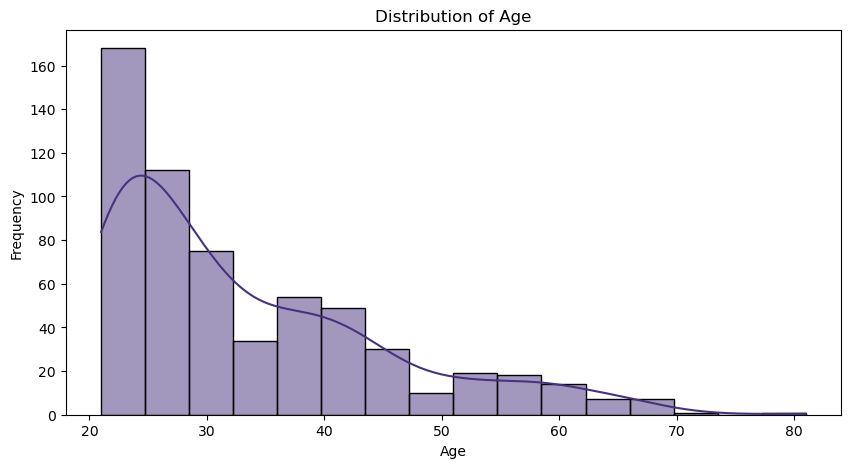

Summary Statistics for Age:
count    599.000000
mean      33.290484
std       11.828446
min       21.000000
25%       24.000000
50%       29.000000
75%       40.000000
max       81.000000
Name: Age, dtype: float64


In [58]:
# Extract the 'Age' column
age_values = train_df['Age']

# Plot a histogram
plt.figure(figsize=(10, 5))
sns.histplot(age_values, kde=True, color=sns.color_palette('viridis')[0])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Summary statistics
print('Summary Statistics for Age:')
print(age_values.describe())

- The average age of patients is approximately 33.29 years.
- Ages range from a minimum of 21 years to a maximum of 81 years.
- Most patients fall within the range of 24 to 40 years.

## ix.Univariate Analysis for 'Insurance'

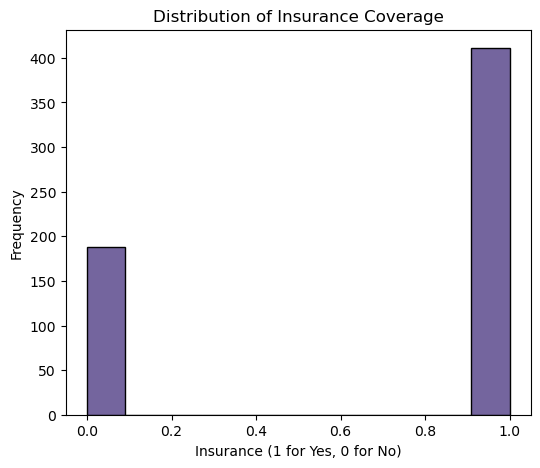

Summary Statistics for Insurance Coverage:
count    599.000000
mean       0.686144
std        0.464447
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Insurance, dtype: float64


In [60]:
# Extract the 'Insurance' column
insurance_values = train_df['Insurance']

# Plot a histogram
plt.figure(figsize=(6, 5))
sns.histplot(insurance_values, kde=False, color=sns.color_palette('viridis')[0])
plt.title('Distribution of Insurance Coverage')
plt.xlabel('Insurance (1 for Yes, 0 for No)')
plt.ylabel('Frequency')
plt.show()

# Summary statistics
print('Summary Statistics for Insurance Coverage:')
print(insurance_values.describe())

- About 68.6% of the patients have insurance coverage, based on the mean value.

## x.Univariate Analysis for 'Sepsis'

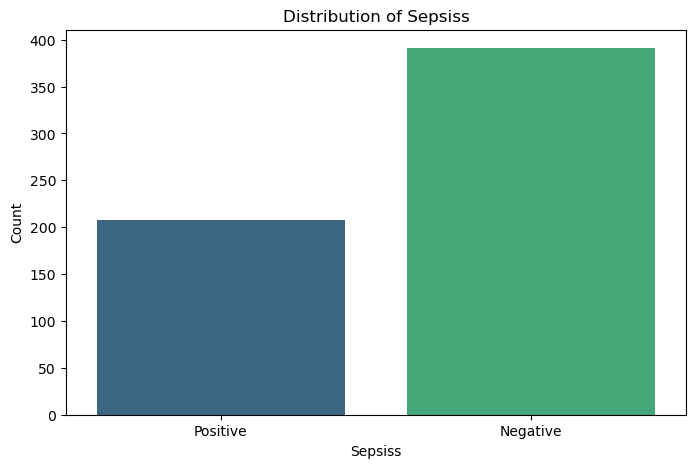

Insights for the Distribution of Sepsiss:
- There are 208 patients with sepsis (Positive) and 391 patients without sepsis (Negative).
- The distribution shows an imbalance, with more patients without sepsis.


In [74]:
# Plot the distribution of Sepsiss
plt.figure(figsize=(8, 5))
sns.countplot(data=train_df, x='Sepssis', palette='viridis')
plt.title('Distribution of Sepsiss')
plt.xlabel('Sepsiss')
plt.ylabel('Count')
plt.show()


# Insights
sepsis_counts = train_df['Sepssis'].value_counts()
print("Insights for the Distribution of Sepsiss:")
print(f"- There are {sepsis_counts['Positive']} patients with sepsis (Positive) and {sepsis_counts['Negative']} patients without sepsis (Negative).")
print("- The distribution shows an imbalance, with more patients without sepsis.")

# Bivariate Analysis

## i. Bivariate Analysis: PRG vs. PL (Number of Pregnancies vs. Plasma Glucose Concentration)

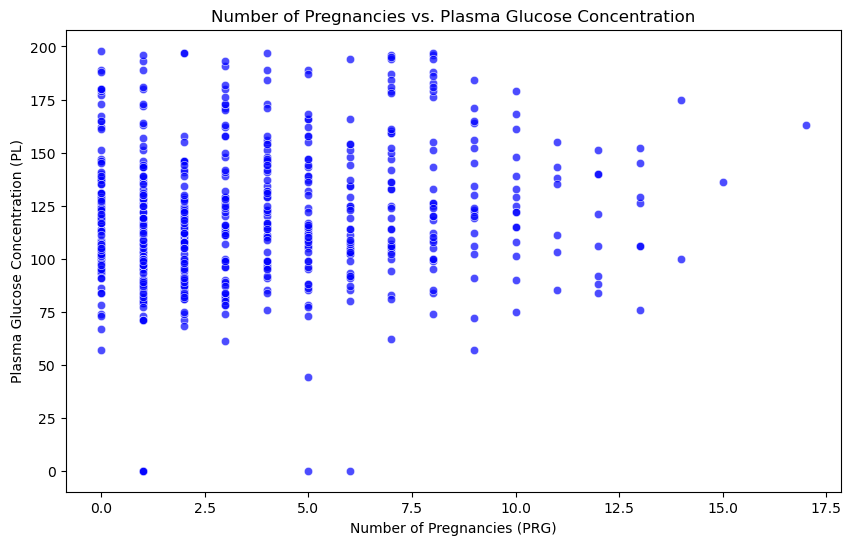

In [95]:
# Create a scatter plot to visualize the relationship between 'PRG' and 'PL'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_df, x='PRG', y='PL', color='blue', alpha=0.7)
plt.title('Number of Pregnancies vs. Plasma Glucose Concentration')
plt.xlabel('Number of Pregnancies (PRG)')
plt.ylabel('Plasma Glucose Concentration (PL)')
plt.show()

- There is no clear linear relationship between the number of pregnancies (PRG) and plasma glucose concentration (PL).
- The points are scattered across different values of PRG and PL.

## ii. Bivariate Analysis between 'PR' and 'SK' (Diastolic Blood Pressure vs. Triceps Skinfold Thickness)

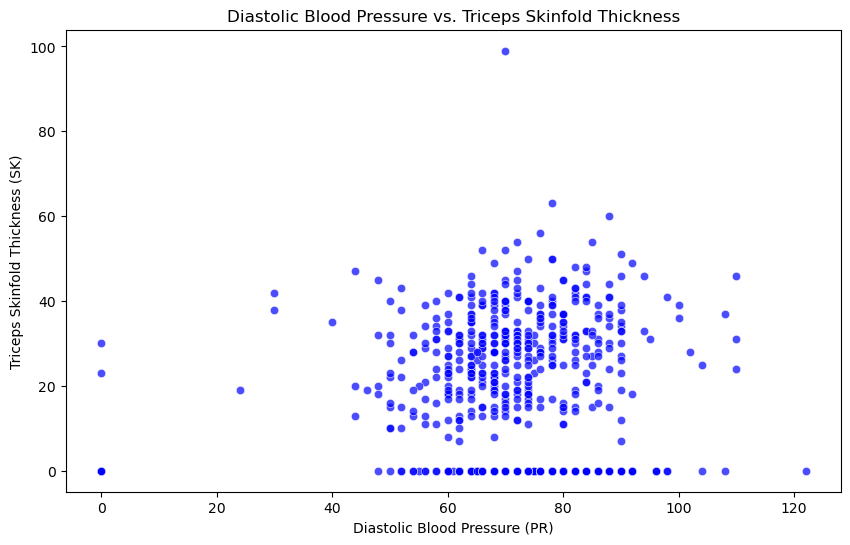

In [96]:
# Create a scatter plot to visualize the relationship between 'PR' and 'SK'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_df, x='PR', y='SK', color='blue', alpha=0.7)
plt.title('Diastolic Blood Pressure vs. Triceps Skinfold Thickness')
plt.xlabel('Diastolic Blood Pressure (PR)')
plt.ylabel('Triceps Skinfold Thickness (SK)')
plt.show()

- There is no clear linear relationship between the number of pregnancies (PRG) and Triceps Skinfold Thickness (SK).
- The points are scattered across different values of PRG and SK.

## iii. Bivariate Analysis between 'TS' and 'M11' (2-Hour Serum Insulin vs. BMI)

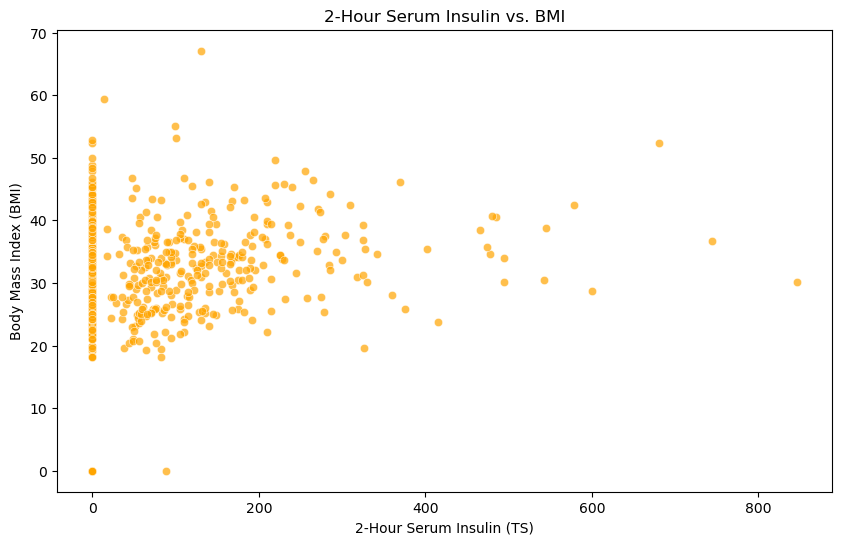

In [98]:
# Create a scatter plot to visualize the relationship between 'TS' and 'M11'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_df, x='TS', y='M11', color='orange', alpha=0.7)
plt.title('2-Hour Serum Insulin vs. BMI')
plt.xlabel('2-Hour Serum Insulin (TS)')
plt.ylabel('Body Mass Index (BMI)')
plt.show()

There is a positive correlation between these variables, indicating that as 2-hour serum insulin levels increase, BMI tends to increase as well.

## iv. Bivariate Analysis between 'BD2' and 'Age' (Diabetes Pedigree Function vs. Age)

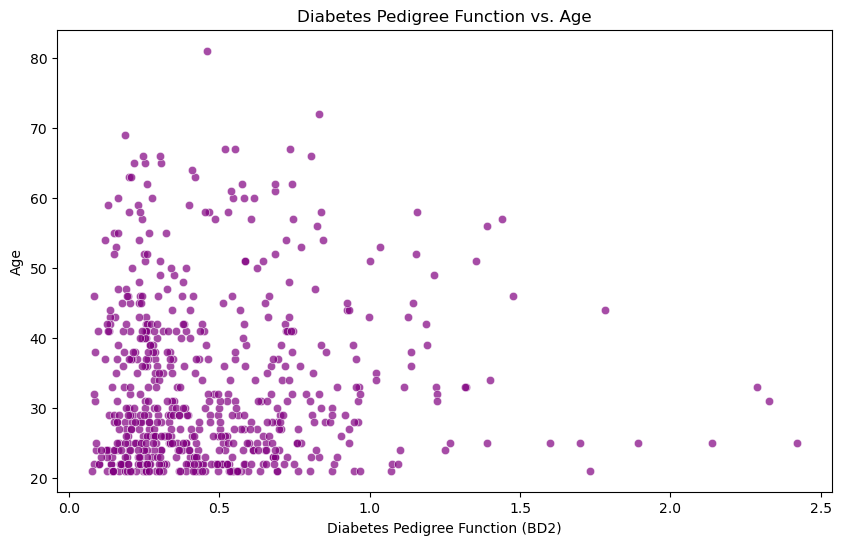

In [99]:
# Create a scatter plot to visualize the relationship between 'BD2' and 'Age'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_df, x='BD2', y='Age', color='purple', alpha=0.7)
plt.title('Diabetes Pedigree Function vs. Age')
plt.xlabel('Diabetes Pedigree Function (BD2)')
plt.ylabel('Age')
plt.show()

 There doesn't appear to be a strong linear correlation between these two variables; the data points are scattered.

## v.Bivariate Analysis between 'Insurance' and 'Age' (Insurance Coverage vs. Age)

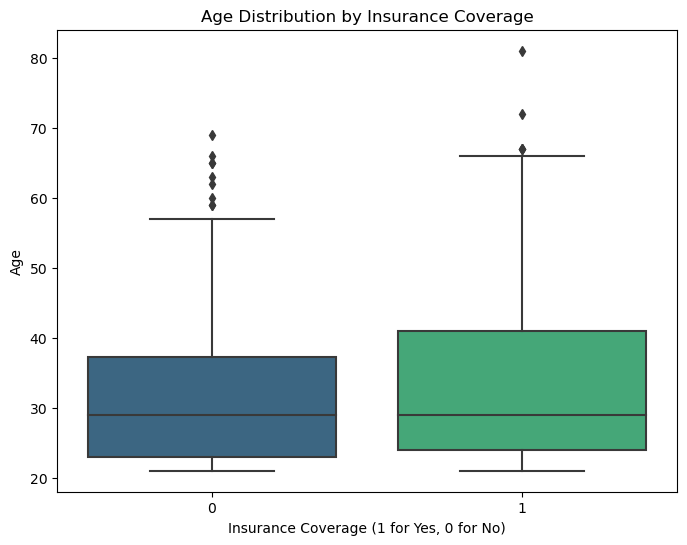

In [103]:
# A box plot to visualize the distribution of age by insurance coverage
plt.figure(figsize=(8, 6))
sns.boxplot(data=train_df, x='Insurance', y='Age', palette='viridis')
plt.title('Age Distribution by Insurance Coverage')
plt.xlabel('Insurance Coverage (1 for Yes, 0 for No)')
plt.ylabel('Age')
plt.show()

Patients with insurance coverage tend to have a wider age range, while those without insurance coverage are predominantly younger.